# Fitting models and interpreting results

## Load and describe the data

In [1]:
use "https://github.com/quarcs-lab/data-open/raw/master/nhanes/nhanes_clean.dta", clear

(Fictitious data based on the National Health and Nutrition Examination Survey)


In [2]:
describe


Contains data from https://github.com/quarcs-lab/data-open/raw/master/nhanes/nha
> nes_clean.dta
  obs:         1,267                          Fictitious data based on the
                                                National Health and Nutrition
                                                Examination Survey
 vars:            21                          9 Feb 2016 17:24
                                              (_dta has notes)
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              str6    %9s                   Identification Number
age             byte    %10.0g                Age (years)
sex             byte    %9.0g      SexLabel   Sex
race            byte    %8.0g      race_n     Race
height          float   %9.0g                 height (cm)
weight 

In [3]:
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          id |          0
         age |      1,266    48.44076    16.98858         20         74
         sex |      1,267    .4664562    .4990705          0          1
        race |      1,267    2.704815    .6973209          1          3
      height |      1,266    167.1308     9.61487    144.199    193.398
-------------+---------------------------------------------------------
      weight |      1,266    72.17252    16.28185      39.12     175.88
         sbp |      1,267    130.6843    24.34302         65        254
         dbp |      1,267    80.54854    13.99187         35        150
 cholesterol |      1,267    216.4917    46.86525         89        426
triglyceri~s |        633    140.7962    89.34762         40       1191
-------------+---------------------------------------------------------
         hdl |      1,080    50.16019

## Distribution the dependent variable

(bin=31, start=65, width=6.0967742)


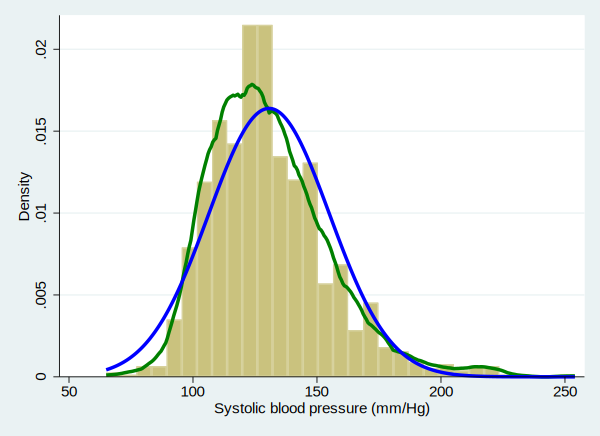

In [5]:
histogram sbp, normal   normopts(lcolor(blue)  lwidth(thick)) ///
               kdensity kdenopts(lcolor(green) lwidth(thick))

## Regression with one continuous covariate

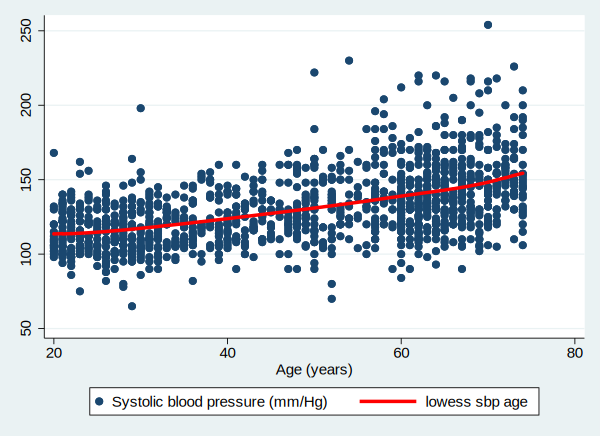

In [14]:
twoway (scatter sbp age) ///
        (lowess sbp age, lcolor(red) lwidth(thick))

The relationship seems linear

In [7]:
reg sbp age


      Source |       SS           df       MS      Number of obs   =     1,266
-------------+----------------------------------   F(1, 1264)      =    445.18
       Model |  195206.733         1  195206.733   Prob > F        =    0.0000
    Residual |  554256.247     1,264  438.493866   R-squared       =    0.2605
-------------+----------------------------------   Adj R-squared   =    0.2599
       Total |   749462.98     1,265  592.460854   Root MSE        =     20.94

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .7312149   .0346561    21.10   0.000     .6632251    .7992046
       _cons |   95.24211   1.778938    53.54   0.000     91.75212    98.73211
------------------------------------------------------------------------------


On average, SBP is 0.73 mm/Hg higher for each additional year of age.
(On average, when `year` increases by one unit, `sbp` increases by 0.73 units)

Let's use factor variable notation

In [17]:
reg sbp c.age


      Source |       SS           df       MS      Number of obs   =     1,266
-------------+----------------------------------   F(1, 1264)      =    445.18
       Model |  195206.733         1  195206.733   Prob > F        =    0.0000
    Residual |  554256.247     1,264  438.493866   R-squared       =    0.2605
-------------+----------------------------------   Adj R-squared   =    0.2599
       Total |   749462.98     1,265  592.460854   Root MSE        =     20.94

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .7312149   .0346561    21.10   0.000     .6632251    .7992046
       _cons |   95.24211   1.778938    53.54   0.000     91.75212    98.73211
------------------------------------------------------------------------------


In this case, the use of factor variable notation is irrelevant

### Adjusted predictions using the `margins` and `marginsplot` commands




Adjusted predictions                            Number of obs     =      1,266
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : age             =          20

2._at        : age             =          30

3._at        : age             =          40

4._at        : age             =          50

5._at        : age             =          60

6._at        : age             =          70

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         _at |
          1  |   109.8664    1.14798    95.70   0.000     107.6143    112.1186
          2  |   117.1786   .8687868   134.88   0.000     115.4741     118.883
          3  |   124.4907   .6572151   189.42   0.000     123.2014    125.7801
          4  |   131.8029   .5910006   223.02   0

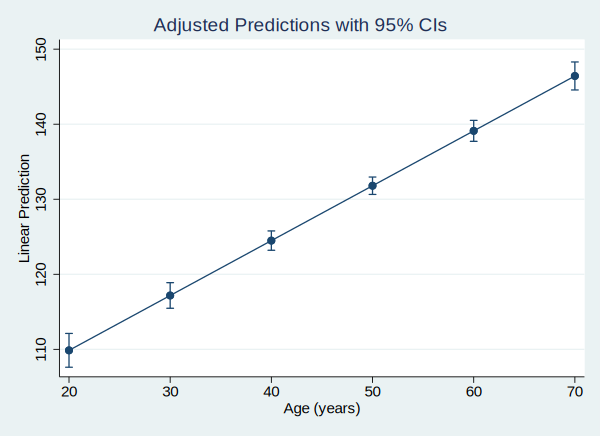




  Variables that uniquely identify margins: age


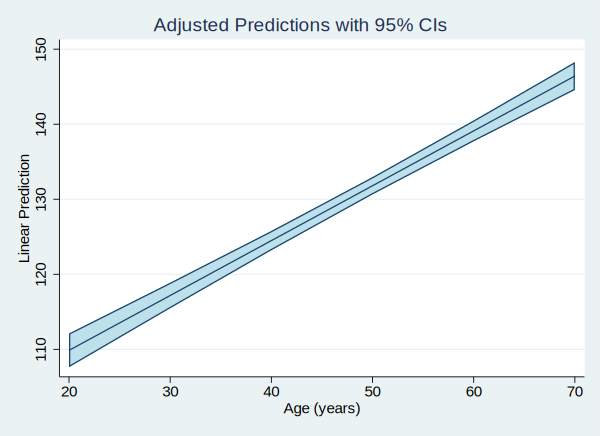

In [13]:
quietly regress sbp age
margins, at(age=(20(10)70))
marginsplot
marginsplot, recast(line) recastci(rarea) ciopts(fcolor(ltblue))

## Regression with one binary covariate

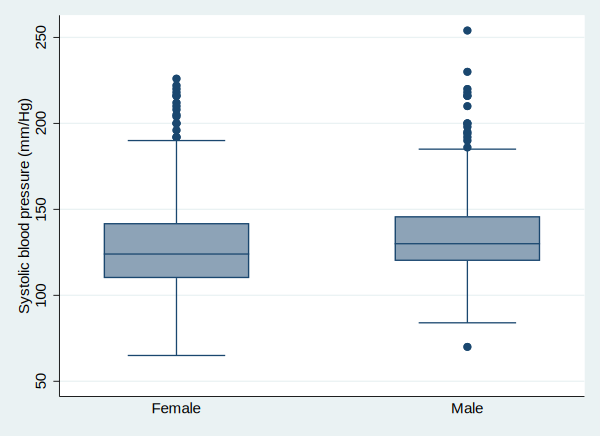

In [15]:
graph box sbp, over(sex)

Males tend to have higher `sbp`.

> In the dataset, females are coded “0” and males are coded “1”. Thus, in a regression, females will be the benchmark category.

In [16]:
reg sbp sex


      Source |       SS           df       MS      Number of obs   =     1,267
-------------+----------------------------------   F(1, 1265)      =     13.85
       Model |  8124.53576         1  8124.53576   Prob > F        =    0.0002
    Residual |  742085.182     1,265  586.628602   R-squared       =    0.0108
-------------+----------------------------------   Adj R-squared   =    0.0100
       Total |  750209.717     1,266  592.582715   Root MSE        =     24.22

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |   5.075987   1.363964     3.72   0.000     2.400107    7.751867
       _cons |   128.3166   .9315545   137.74   0.000      126.489    130.1441
------------------------------------------------------------------------------


On average, `sbp` for females is 128.3  and the `sbp` for males is 5.1 mm/Hg higher than females.

### Factor variable notation

The `i.` operator in front of the variable sex specifies that sex is a categorical variable. Stata will automatically create indicator variables for sex and label them in the output.

In [18]:
list sex i.sex in 1/10


     +--------------------+
     |            0.    1.|
     |    sex   sex   sex |
     |--------------------|
  1. |   Male     0     1 |
  2. | Female     1     0 |
  3. |   Male     0     1 |
  4. | Female     1     0 |
  5. |   Male     0     1 |
     |--------------------|
  6. | Female     1     0 |
  7. | Female     1     0 |
  8. | Female     1     0 |
  9. | Female     1     0 |
 10. |   Male     0     1 |
     +--------------------+


In [19]:
reg sbp i.sex


      Source |       SS           df       MS      Number of obs   =     1,267
-------------+----------------------------------   F(1, 1265)      =     13.85
       Model |  8124.53576         1  8124.53576   Prob > F        =    0.0002
    Residual |  742085.182     1,265  586.628602   R-squared       =    0.0108
-------------+----------------------------------   Adj R-squared   =    0.0100
       Total |  750209.717     1,266  592.582715   Root MSE        =     24.22

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |
       Male  |   5.075987   1.363964     3.72   0.000     2.400107    7.751867
       _cons |   128.3166   .9315545   137.74   0.000      126.489    130.1441
------------------------------------------------------------------------------


The factor variable notation provides an more informative label in the regression table 

### Adjusted predictions using the `margins` and `marginsplot` commands




Adjusted predictions                            Number of obs     =      1,267
Model VCE    : OLS

Expression   : Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |
     Female  |   128.3166   .9315545   137.74   0.000      126.489    130.1441
       Male  |   133.3926   .9962948   133.89   0.000      131.438    135.3471
------------------------------------------------------------------------------


  Variables that uniquely identify margins: sex


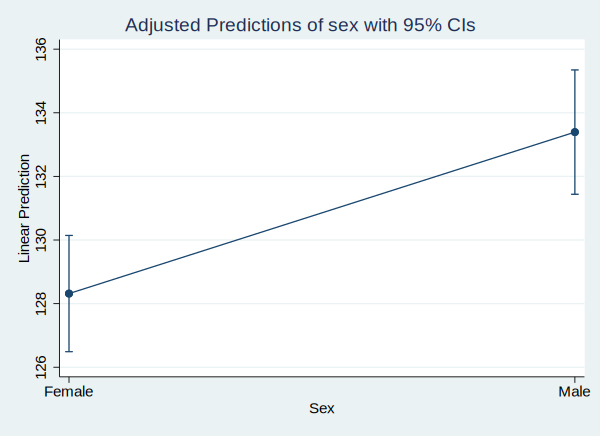




  Variables that uniquely identify margins: sex


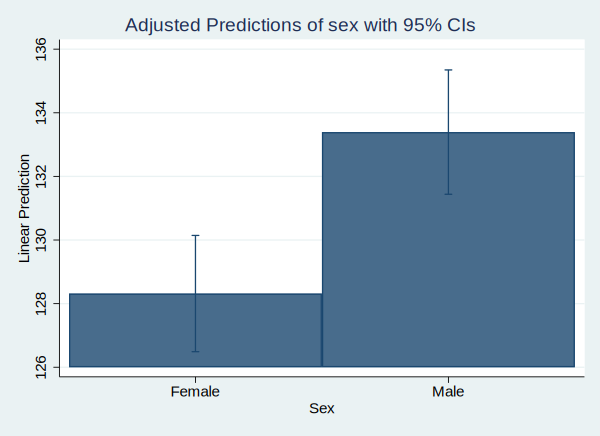

In [22]:
quietly reg sbp i.sex
margins sex
marginsplot
marginsplot, recast(bar)

The regression model predicts that the average sbp for females is 128.3 and the average sbp for males is 133.4. Moreover, the difference between females and males is statistically significant

## Regression with one categorical covariate